# USA Youtube Data Analysis

YouTube is a global online video sharing and social media platform. Milions of people use it on daily basis. This dataset includes data on daily trending YouTube videos published from 2006 to 2018. 

It is necessary to identify patterns that determine the success of video. This will allow us to bid on a potentially popular video.

The aim of the research is to analyze data and test two hypotheses.

- The average number of views in categories Music and Entertainment is the same;
- People prefer watching videos about people and blogs over sport. 

The research will take place in four stages:

1. Data overview
2. Data preprocessing
3. Exploratory data analysis
4. Statistical data analysis. Hypothesis examination. 

## Data overview

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv ('USvideos.csv')
except: 
    df = pd.read_csv("/kaggle/input/youtube-new/USvideos.csv")

In [3]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [4]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [6]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [7]:
df.isna().mean()

video_id                  0.00000
trending_date             0.00000
title                     0.00000
channel_title             0.00000
category_id               0.00000
publish_time              0.00000
tags                      0.00000
views                     0.00000
likes                     0.00000
dislikes                  0.00000
comment_count             0.00000
thumbnail_link            0.00000
comments_disabled         0.00000
ratings_disabled          0.00000
video_error_or_removed    0.00000
description               0.01392
dtype: float64

In [8]:
df.duplicated().sum()

48

In [9]:
df.shape

(40949, 16)

Data overview shows that there is information of over 40000 videos at our disposal.
Based on the data in the table, we can conclude that before analysis, it is necessary to perform preprocessing.
The data types in the columns are `int`, `object`, `float`.

According to the data documentation:

`video_id` - The id of the video 

`trending_date` - The date when the video was trending 

`title` - The name of the video

`channel_title` - The name of the channel

`category_id` - The id of category

`publish_time` - The date when the video was published

`tags` - Tags 

`views` - The number of views

`likes`  - The number of likes

`dislikes` - The number of dislikes

`comment_count`- The number of comments

`thumbnail_link` - Thumbnail link

`comments_disabled` - Comments of this video are disabled

`ratings_disabled` - Ratings of this video are disabled

`video_error_or_removed` - If the the video has error or removed

`description` - The description of the video


It is necessary to:
- change the data type in the following columns `publish_time`, `trending_date`.
- missing values in the data should be examined and replaced if necessary.
- there duplicates which must be dropped. 

## Data preprocessing

In [10]:
df = df.drop_duplicates().reset_index(drop=True)

In [11]:
df.duplicated().sum()

0

There are missing values in `description`. Let's replace it with `no info`

In [12]:
df = df.fillna('no info')

The type of data 

In [13]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40901 entries, 0 to 40900
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40901 non-null  object        
 1   trending_date           40901 non-null  datetime64[ns]
 2   title                   40901 non-null  object        
 3   channel_title           40901 non-null  object        
 4   category_id             40901 non-null  int64         
 5   publish_time            40901 non-null  object        
 6   tags                    40901 non-null  object        
 7   views                   40901 non-null  int64         
 8   likes                   40901 non-null  int64         
 9   dislikes                40901 non-null  int64         
 10  comment_count           40901 non-null  int64         
 11  thumbnail_link          40901 non-null  object        
 12  comments_disabled       40901 non-null  bool  

Data types were changed, duplicates were dropped, and missing values were replaced. Let's move on to data analysis.

## Exploratory data analysis

In [15]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [16]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

### Correlation

In [17]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168243,-0.173946,-0.033583,-0.076365,0.048935,-0.013496,-0.030019
views,-0.168243,1.000000,0.849179,0.472216,0.617657,0.002700,0.015357,-0.002256
likes,-0.173946,0.849179,1.000000,0.447188,0.803088,-0.028903,-0.020891,-0.002642
dislikes,-0.033583,0.472216,0.447188,1.000000,0.700192,-0.004416,-0.008231,-0.001853
comment_count,-0.076365,0.617657,0.803088,0.700192,1.000000,-0.028261,-0.013822,-0.003726
comments_disabled,0.048935,0.002700,-0.028903,-0.004416,-0.028261,1.000000,0.319486,-0.002972
ratings_disabled,-0.013496,0.015357,-0.020891,-0.008231,-0.013822,0.319486,1.000000,-0.001528
video_error_or_removed,-0.030019,-0.002256,-0.002642,-0.001853,-0.003726,-0.002972,-0.001528,1.000000


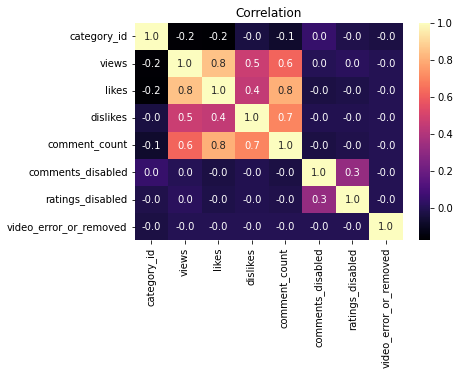

In [18]:
sns.heatmap(df.corr(), annot=True, fmt= '.1f', cmap='magma').set(title = 'Correlation');

It can observed that there is correlation between views and likes, dislikes, number of comments.

Let's analyze the date when videos were published and trending.

### Date of publishing

In [19]:
publish_year = pd.DatetimeIndex(df['publish_time']).year
publish_month = pd.DatetimeIndex(df['publish_time']).month
publish_day = pd.DatetimeIndex(df['publish_time']).day
publish_weekday = pd.DatetimeIndex(df['publish_time']).weekday
publish_hour = pd.DatetimeIndex(df['publish_time']).hour

In [20]:
df.groupby(publish_year)['video_id'].count()

publish_time
2006        1
2008       11
2009       14
2010       19
2011       27
2012       24
2013       44
2014       32
2015       35
2016       35
2017    10428
2018    30231
Name: video_id, dtype: int64

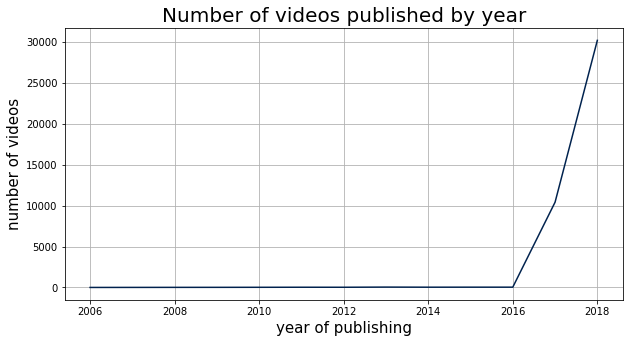

In [21]:
plt.figure(figsize=(10,5))
df.groupby(publish_year)['video_id'].count().plot(colormap='cividis', grid=True)
plt.title('Number of videos published by year', fontsize=20)
plt.xlabel('year of publishing', fontsize=15)
plt.ylabel('number of videos', fontsize=15)
plt.show();


Most of the videos were published in 2017 and 2018. 

How about videos which were published in different months, days, weekdays, and hours? Which videos get more views?

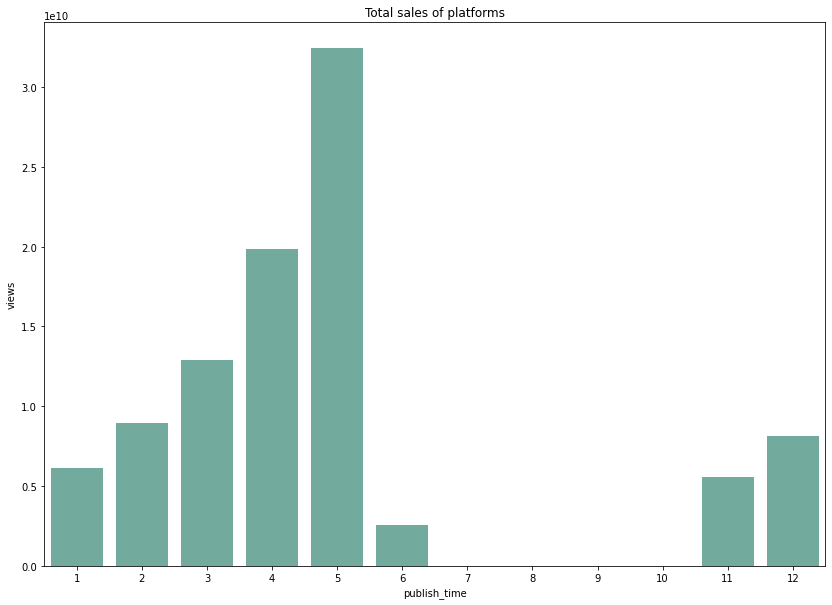

In [22]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y=df['views'], 
    x=publish_month, 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2').set(title='Total sales of platforms');

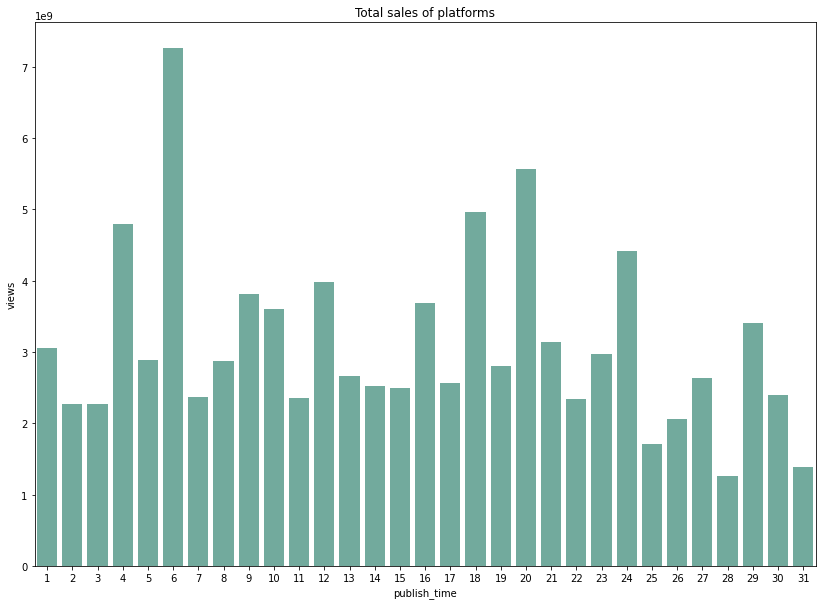

In [23]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y=df['views'], 
    x=publish_day, 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2').set(title='Total sales of platforms');

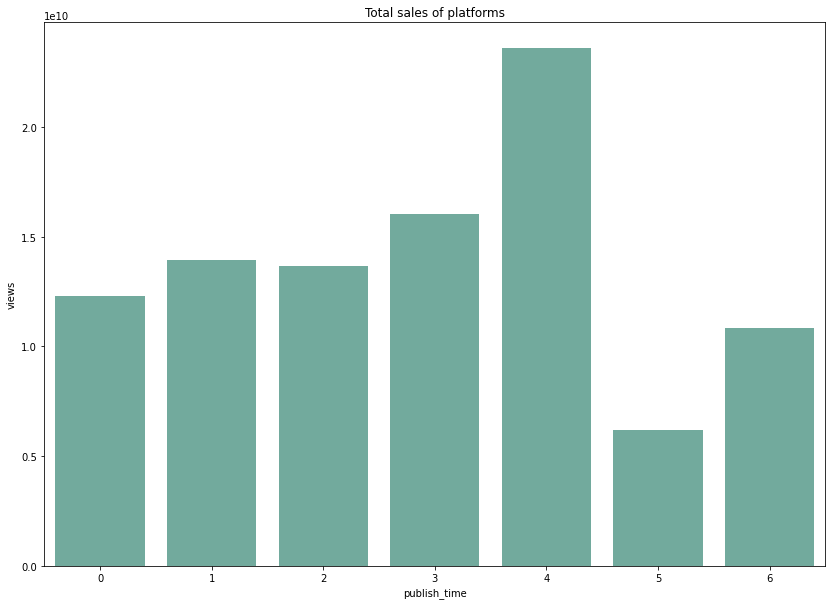

In [24]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y=df['views'], 
    x=publish_weekday, 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2').set(title='Total sales of platforms');

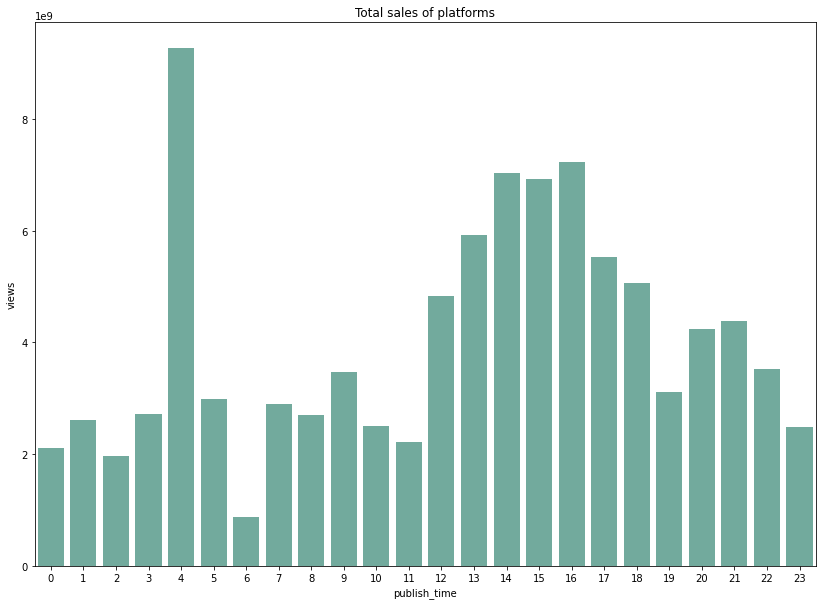

In [25]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y=df['views'], 
    x=publish_hour, 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2').set(title='Total sales of platforms');

It can be concluded that videos which get more views are published in April or May, on Thursday and in the evening or at 4 o'clock. 

### Date of trending

Let's study date of trending, views, likes and dislikes.

#### Trending date

In [26]:
trend_year = pd.DatetimeIndex(df['trending_date']).year
df.groupby(trend_year)['video_id'].count()

trending_date
2017     9600
2018    31301
Name: video_id, dtype: int64

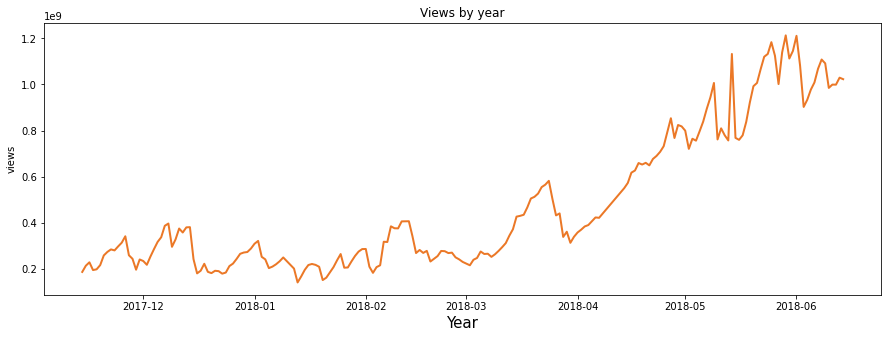

In [27]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df.groupby("trending_date")["views"].sum(), linewidth=2,color="#EB7827").set(title = 'Views by year')
plt.gca().set_xlabel("Year", fontsize=15)
plt.show()

There more trending videos in 2018. The number of videos is increasing. 

#### Channels

Let's study channels.

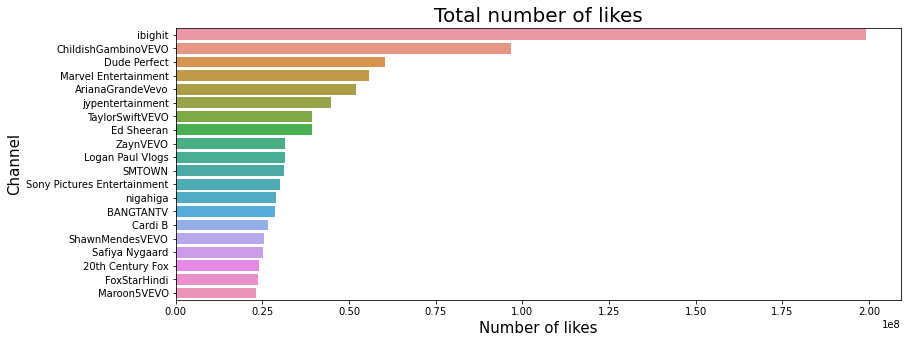

In [28]:
liked=pd.DataFrame(df.groupby(["channel_title"])["likes"].agg("sum").sort_values(ascending=False))[:20]
plt.figure(figsize=(13,5))
sns.barplot(y=liked.index,x=liked.likes,data=liked)
plt.title('Total number of likes', fontsize=20)
plt.xlabel('Number of likes',fontsize=15)
plt.ylabel('Channel',fontsize=15)
plt.show()

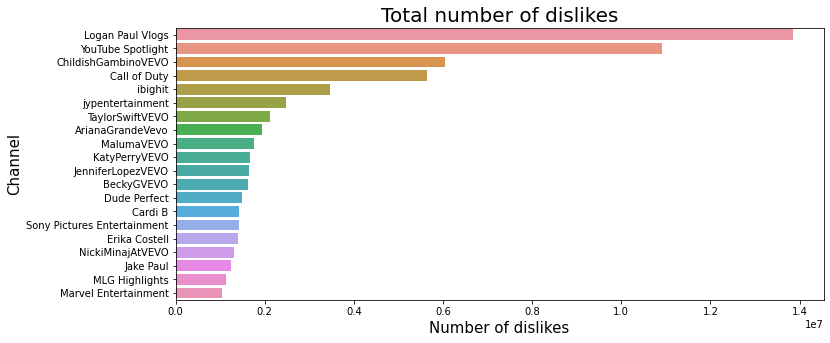

In [29]:

disliked=pd.DataFrame(df.groupby(["channel_title"])["dislikes"].agg("sum").sort_values(ascending=False))[:20]
plt.figure(figsize=(15,5))
sns.barplot(y=disliked.index,x=disliked.dislikes,data=disliked)
plt.title('Total number of dislikes', fontsize=20)
plt.xlabel('Number of dislikes',fontsize=15)
plt.ylabel('Channel',fontsize=15)
plt.gcf().subplots_adjust(left=.3)
plt.show()

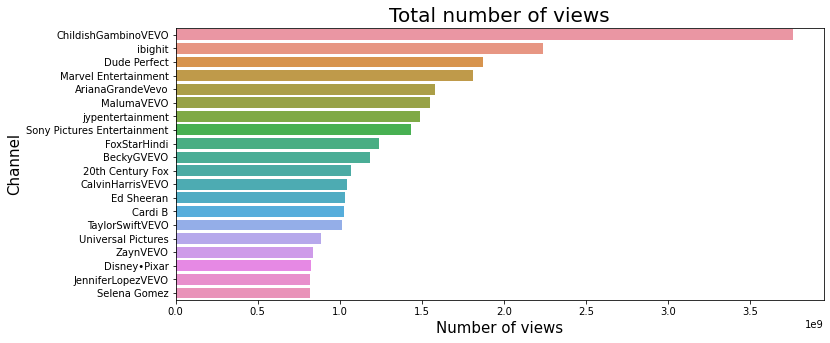

In [30]:

viewed=pd.DataFrame(df.groupby(["channel_title"])["views"].agg("sum").sort_values(ascending=False))[:20]
plt.figure(figsize=(15,5))
sns.barplot(y=viewed.index,x=viewed.views,data=viewed)
plt.title('Total number of views', fontsize=20)
plt.xlabel('Number of views', fontsize=15)
plt.ylabel('Channel', fontsize=15)
plt.gcf().subplots_adjust(left=.3)
plt.show()

The most popular channel is `ChildishGambinoVEVO`. It has more than 3 billion views, then goes `ibighit` and `Dude Perfect`.

The channel which has more highest number of likes is `ibighit` and dislikes is `Logan Paul vlogs`. 

#### Category

Let's study categories. According to the documentation they are following.

In [31]:
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

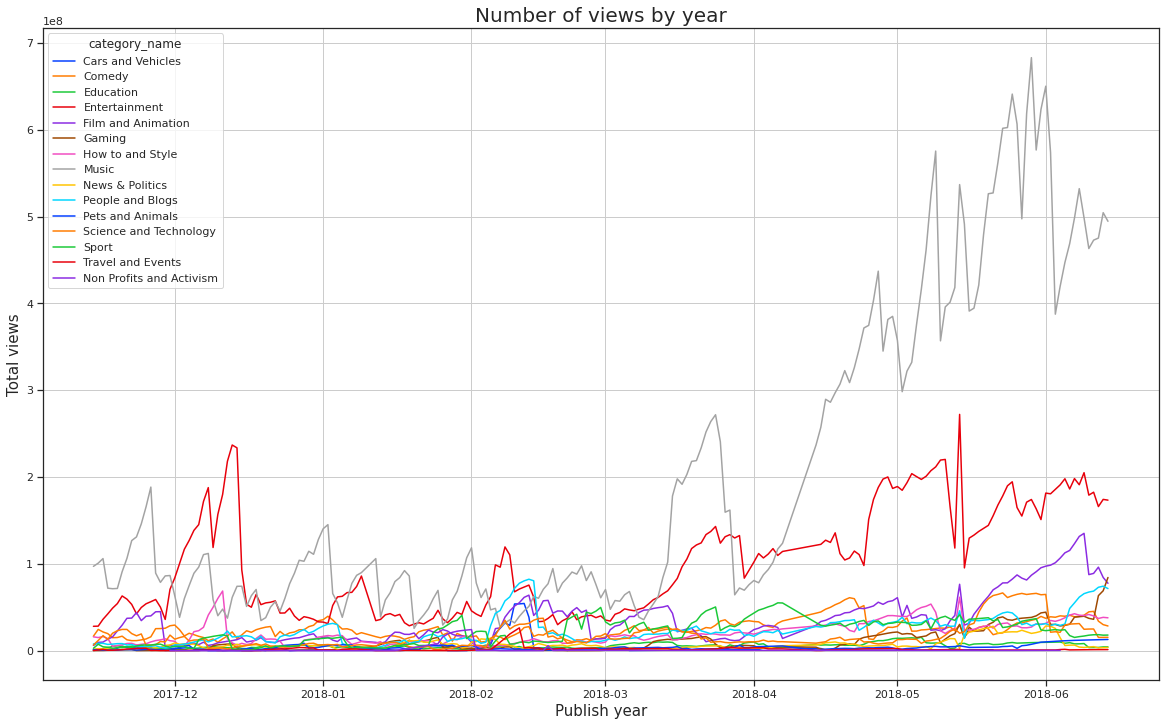

In [32]:
plt.figure(figsize=(20,12))
sns.set(style="ticks")
sns.lineplot(data = df.groupby(['trending_date', 'category_name']).agg({'views': 'sum'}).reset_index(),
             x = 'trending_date', y = 'views', hue = 'category_name', palette="bright")
plt.title('Number of views by year', fontsize=20)
plt.xlabel('Publish year', fontsize=15)
plt.ylabel('Total views', fontsize=15)
plt.grid();

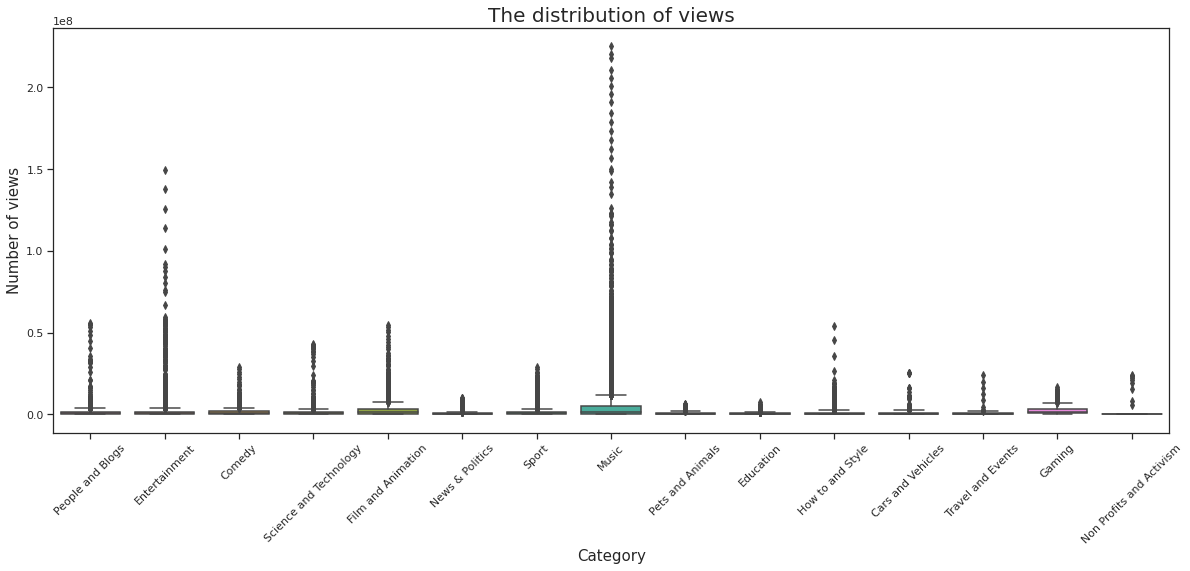

In [33]:
plt.figure(figsize = (20,15))
sns.boxplot(x='category_name',y='views',data=df)
plt.xticks(rotation=45)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Number of views', fontsize=15)
plt.title('The distribution of views', fontsize=20)
plt.gcf().subplots_adjust(top=.5);

In [34]:
(df.groupby(['category_name'])
 .agg({'likes':['min','max','mean'],
       'dislikes':['min','max','mean'],
      'views':['min','max','mean']}))

likes                         dislikes           \
                           min      max           mean      min      max   
category_name                                                              
Cars and Vehicles            0    97030   11056.395833        0    12290   
Comedy                       6   865679   62593.776426        0    29865   
Education                    0   240989   29757.073716        0    11270   
Entertainment                0  3093544   53221.361625        0  1674420   
Film and Animation           0   922355   70680.636364        0    38082   
Gaming                       2   444203   84288.681373        0   212976   
How to and Style             0   605954   39236.091502        0    66632   
Music                        0  5613827  219046.349312        0   343541   
News & Politics              0   163338    7298.667606        0   132439   
Non Profits and Activism     0  1988746  259923.614035        0   497847   
People and Blogs             0  2032463   58089.256546        0   228426   
Pets and Animals             6   178243   21055.110870        0     4899   
Science and Technology       0   564804   34315.815186        0    47469   
Sport                        0  1121217   45402.821823        0   176903   
Travel and Events            3    42447   12034.127182        0     9000   

                                       views                           
                                  mean   min        max          mean  
category_name                                                          
Cars and Vehicles           632.838542  2860   25244097  1.355965e+06  
Comedy                     2090.931364  1807   29178096  1.480239e+06  
Education                   816.702115   773    7349435  7.130972e+05  
Entertainment              4314.622184   798  149376127  2.067689e+06  
Film and Animation         2591.227486   943   54863912  3.101917e+06  
Gaming                    11227.525735  1237   16935442  2.607598e+06  
How to and Style           1318.759536  1107   54155921  9.828614e+05  
Music                      7912.998918  1591  225211923  6.204776e+06  
News & Politics            1681.887726   549   10277358  5.927930e+05  
Non Profits and Activism  58076.859649  1456   24286474  2.963884e+06  
People and Blogs           3172.962594   884   56111957  1.530550e+06  
Pets and Animals            573.238043  3393    6187457  8.311435e+05  
Science and Technology     1890.654568   983   42799458  1.449088e+06  
Sport                      2363.131215   658   29090799  2.027262e+06  
Travel and Events           848.104738   789   23932421  8.556125e+05

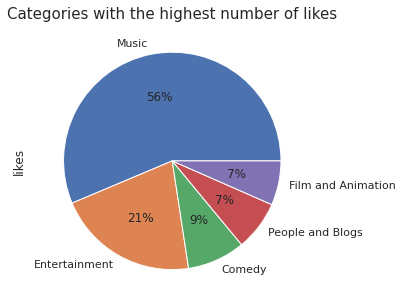

In [35]:
data = (df
            .pivot_table(index="category_name", aggfunc='sum')
            .sort_values("likes", ascending=False)
            .head(5))
data.plot(kind='pie', y="likes",autopct='%1.0f%%', figsize=(10, 5), legend=False).set(label=data.index)
plt.title("Categories with the highest number of likes", fontsize = 15)
plt.show();

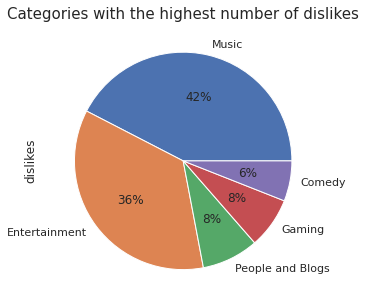

In [36]:
data = (df
            .pivot_table(index="category_name", aggfunc='sum')
            .sort_values("dislikes", ascending=False)
            .head(5))
data.plot(kind='pie', y="dislikes",autopct='%1.0f%%', figsize=(10, 5), legend=False).set(label=data.index)
plt.title("Categories with the highest number of dislikes", fontsize = 15)
plt.show();

It can be concluded that the most popular categories are `Music, 'Entertainment` and `People and Blogs`. Category `Music` has also the highest number of likes and dislikes. `Entertainment` follows.

#### Videos

In [37]:
df.sort_values(by ="views" , ascending = False).drop_duplicates('title', keep = 'first').head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
38499,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music


In [38]:
df.sort_values(by ="likes" , ascending = False).drop_duplicates('title', keep = 'first').head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
38225,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music


In [39]:
df.sort_values(by ="dislikes" , ascending = False).drop_duplicates('title', keep = 'first').head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
11323,QwZT7T-TXT0,2018-01-09,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,no info,Entertainment


The most popular video in our dataset is `Childish Gambino - This Is America (Official Video)`. The highest number of likes has the video `BTS (방탄소년단) 'FAKE LOVE' Official MV`. The most disliked video is `So Sorry.`. 

#### Comments

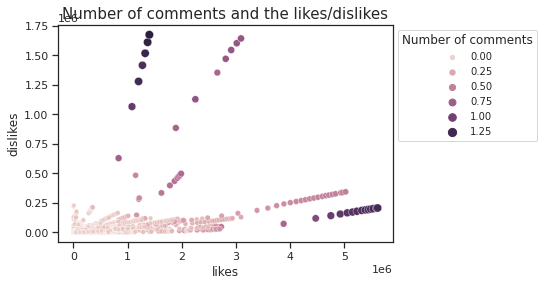

In [40]:
plt.figsize=(100,100)
sns.scatterplot(x="likes",y="dislikes",size="comment_count", hue="comment_count",data=df,alpha=1)
plt.title("Number of comments and the likes/dislikes", fontsize = 15)
plt.legend( bbox_to_anchor=(1, 1), loc='upper left',fontsize=10, title='Number of comments');

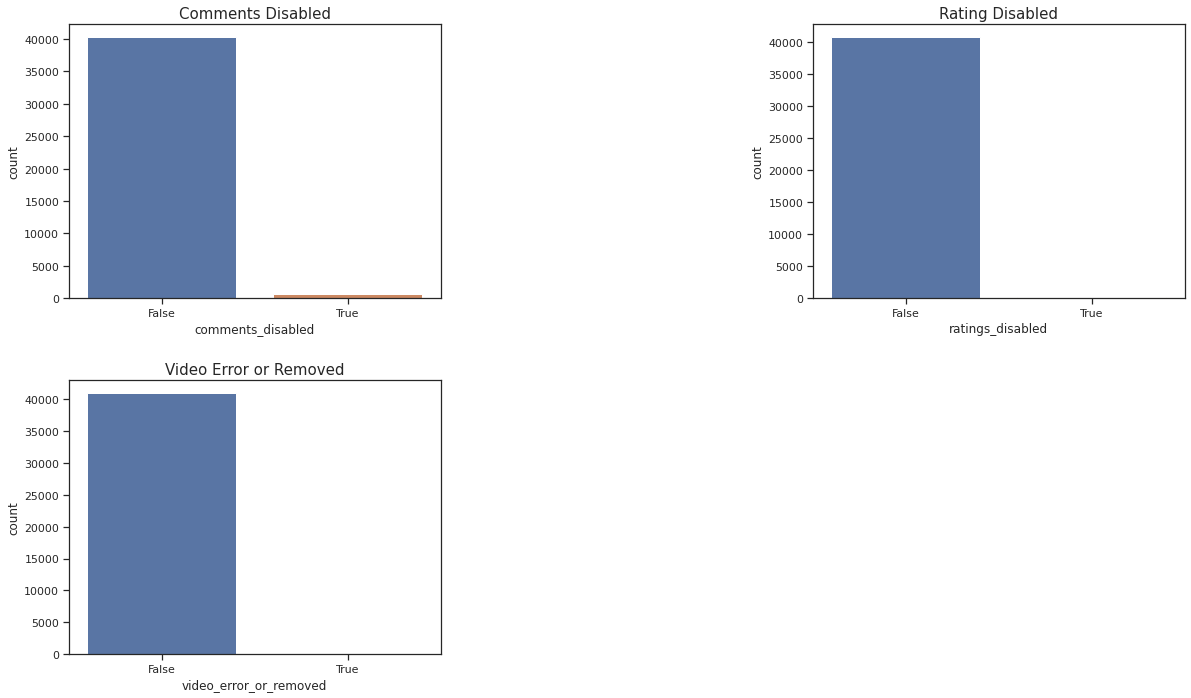

In [41]:
plt.figure(figsize = (20,10))
plt.subplots_adjust(wspace = 1, hspace = 0.3, top = 1)

plt.subplot(2,2,1)
p = sns.countplot(x='comments_disabled', data=df)
p.set_title("Comments Disabled", fontsize=15)

plt.subplot(2,2,2)
p1 = sns.countplot(x='ratings_disabled', data=df)
p1.set_title("Rating Disabled", fontsize=15)

plt.subplot(2,2,3)
p2 = sns.countplot(x='video_error_or_removed', data=df)
p2.set_title("Video Error or Removed", fontsize=15)
plt.show()

As we can see the more likes or dislikes the video has, the more comments it has. And most videos have comments and rating enabled and they have no error nor removed. 

#### Tags and description

In [42]:
tags = df['tags'].map(lambda x : x.lower().split('|')).values


In [43]:
description = df['description'].astype('str')

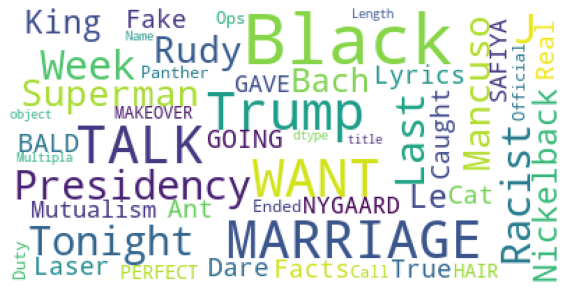

In [44]:
plt.figure(figsize = (10,10))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=50, 
                          random_state=12345
                         ).generate(str(df['title']))


fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

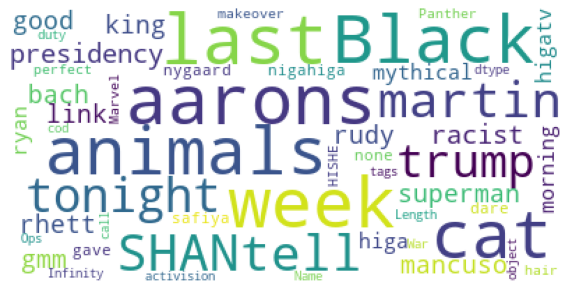

In [45]:
plt.figure(figsize = (10,10))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=50, 
                          random_state=12345
                         ).generate(str(df['tags']))


fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

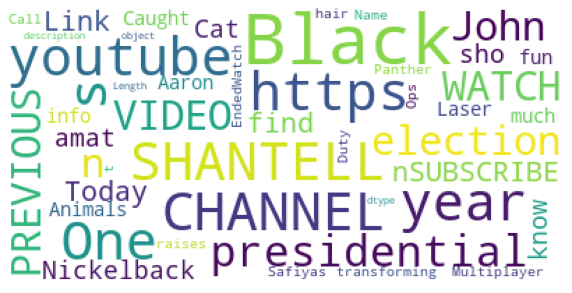

In [46]:
plt.figure(figsize = (10,10))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=50, 
                          random_state=12345
                         ).generate(str(df['description']))


fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

## Statistical data analysis. Hypothesis examination.

#### Examining the first hypothesis

The following hypotheses need to be tested.

Null Hypothesis: The average number of views in categories Music and Entertainment is the same.

Alternative hypothesis: The average number of views in categories Music and Entertainment is the same is different.

We need to apply the scipy.stats.ttest_ind() method in order to test the hypothesis that the mean of two populations is equal based on the samples taken from them.

In [47]:
ent = df.query('category_name == "Music"')['views'].dropna()
mus =  df.query('category_name == "Entertainment"')['views'].dropna()
alpha = .05

results = st.ttest_ind(ent, mus, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")


p-value: 1.0885480105136972e-91
Rejecting the null hypothesis


#### Examining the second hypothesis

Null hypothesis: People prefer watching videos about people and blogs over sport.

Alternative hypothesis: People prefer watching sport and blogs over videos about people.

We need to apply the st.ttest_1samp() method.

In [48]:
peop = df.query('category_name == "Sport"')['likes'].dropna()
sp =  df.query('category_name == "People and Blogs"')['likes'].dropna()
alpha = .05

results = st.ttest_ind(peop, sp, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")


p-value: 0.0004004760500466865
Rejecting the null hypothesis


It can be concluded that the average number of views in categories Music and Entertainment is different and people prefer watching sport and blogs over videos about people.

## Summary

In the course of this research, the data of Youtube was analyzed.

- Most of the videos were published in 2017 and 2018.
- Channel `ChildishGambinoVEVO` has the highest number of views.
- The most disliked channel is `Logan Paul vlogs`.
- People prefer watching which are about  music, entertainment and people. The most popular genre is music. 
- If the video has many likes or dislikes, it also has a great number of comments.
- The most popular tags are `last`, `animal`, `tonight`, `black`, `channel`. 
- The average number of views in categories Music and Entertainment is not the same. 
- People prefer watching sport and blogs over videos about people.